In [ ]:
!pip install vaderSentiment 
!pip install scipy pandas pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 3.2 MB/s 
     |████████████████████████████████| 9.8 MB 7.7 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=fbb4c9eead4225a1d54a816316867b0c18ee664f6d78c30c36f474fff4284185
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=2d44532b53396e6df0da581945baf3d64d9d271b419debbec4489b195e41e28d
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installa

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import math
from scipy.stats import mannwhitneyu


In [ ]:
filepath = '/content/dataset.csv'

In [ ]:
dataframe = pd.read_csv(filepath,on_bad_lines='skip')


In [ ]:
dataframe.head()

,Text,Author_id,Id,Username,Location,Account
0,@boredowntw @snapchatsupport yea i just contac...,1.340000e+18,1.550000e+18,PENIELMARAJ,🇬🇭 || 𝐛𝐥𝐤 || 𝐡𝐞 || 𝐛𝐢,snapchat
1,@alexolix05 @lostsoulnw @snapchatsupport T’as ...,1.540000e+18,1.550000e+18,NaN,NaN,snapchat
2,@snapchatsupport I stil can’t log in to my acc...,1.400000e+18,1.550000e+18,gamermika19,"Roermond, Nederland",snapchat
3,@snapchatsupport @snapchatsupport @Snapchat I...,1.550000e+18,1.550000e+18,NaN,NaN,snapchat
4,@snapchatsupport Help i have been having this ...,1.470000e+18,1.550000e+18,NaN,NaN,snapchat


In [ ]:
analyser = SentimentIntensityAnalyzer()


In [ ]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [ ]:
dataframe['Text'] = clean_tweets(dataframe['Text'])
dataframe['Text'].head()

0      yea i just contacted customer support on the...
1       T’as de la chance, moi impossible de ne ser...
2     I stil can’t log in to my account it says bc ...
3        I have not been received an email or anyth...
4     Help i have been having this issue since yest...
Name: Text, dtype: object

In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(dataframe['Text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyser.polarity_scores(dataframe['Text'][i])["compound"]
    pos = analyser.polarity_scores(dataframe['Text'][i])["pos"]
    neu = analyser.polarity_scores(dataframe['Text'][i])["neu"]
    neg = analyser.polarity_scores(dataframe['Text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score = pd.DataFrame.from_dict(scores)
dataframe = dataframe.join(sentiments_score)
dataframe.head()

,Text,Author_id,Id,Username,Location,Account,Compound,Positive,Negative,Neutral
0,yea i just contacted customer support on the...,1.340000e+18,1.550000e+18,PENIELMARAJ,🇬🇭 || 𝐛𝐥𝐤 || 𝐡𝐞 || 𝐛𝐢,snapchat,-0.6597,0.077,0.259,0.664
1,"T’as de la chance, moi impossible de ne ser...",1.540000e+18,1.550000e+18,NaN,NaN,snapchat,0.2500,0.167,0.000,0.833
2,I stil can’t log in to my account it says bc ...,1.400000e+18,1.550000e+18,gamermika19,"Roermond, Nederland",snapchat,0.1855,0.101,0.109,0.790
3,I have not been received an email or anyth...,1.550000e+18,1.550000e+18,NaN,NaN,snapchat,0.4019,0.130,0.000,0.870
4,Help i have been having this issue since yest...,1.470000e+18,1.550000e+18,NaN,NaN,snapchat,0.5267,0.157,0.067,0.776


In [ ]:
def sentimentPredict(sentiment):
  if sentiment >= 0.05:
    return "Positive"
  elif sentiment <= -0.05: 
    return "Negative"
  else:
    return "Neutral"
dataframe['label'] =dataframe['Compound'].apply(lambda x: sentimentPredict(x))
dataframe.head(10)

,Text,Author_id,Id,Username,Location,Account,Compound,Positive,Negative,Neutral,label
0,yea i just contacted customer support on the...,1.340000e+18,1.550000e+18,PENIELMARAJ,🇬🇭 || 𝐛𝐥𝐤 || 𝐡𝐞 || 𝐛𝐢,snapchat,-0.6597,0.077,0.259,0.664,Negative
1,"T’as de la chance, moi impossible de ne ser...",1.540000e+18,1.550000e+18,NaN,NaN,snapchat,0.2500,0.167,0.000,0.833,Positive
2,I stil can’t log in to my account it says bc ...,1.400000e+18,1.550000e+18,gamermika19,"Roermond, Nederland",snapchat,0.1855,0.101,0.109,0.790,Positive
3,I have not been received an email or anyth...,1.550000e+18,1.550000e+18,NaN,NaN,snapchat,0.4019,0.130,0.000,0.870,Positive
4,Help i have been having this issue since yest...,1.470000e+18,1.550000e+18,NaN,NaN,snapchat,0.5267,0.157,0.067,0.776,Positive
5,Hello??!!! I’ve been tweeting you and no re...,1.430000e+18,1.550000e+18,NaN,NaN,snapchat,0.6836,0.223,0.109,0.668,Positive
6,how long is temporary,1.480000e+18,1.550000e+18,NaN,NaN,snapchat,0.0000,0.000,0.000,1.000,Neutral
7,Exact problem I'm having now and yes earli...,3.449564e+08,1.550000e+18,NaN,NaN,snapchat,0.2023,0.296,0.178,0.526,Positive
8,Mine won't work either and I ahe just S22,1.450000e+18,1.550000e+18,NaN,NaN,snapchat,0.0000,0.000,0.000,1.000,Neutral
9,"when switching between cameras on my s22, i c...",1.090000e+18,1.550000e+18,DrMagnusW1,"Steinkjer, Norge",snapchat,0.5499,0.139,0.000,0.861,Positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


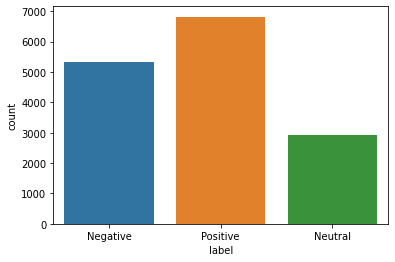

In [ ]:
import seaborn as sns
sns.countplot(dataframe['label'], label='count')


In [ ]:
positive = dataframe[dataframe['label']== 'Positive']
negative = dataframe[dataframe['label']== 'Negative']
neutral  = dataframe[dataframe['label']=='Neutral']

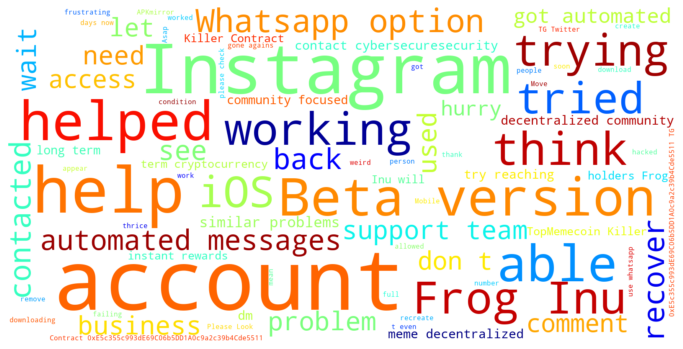

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(dataframe['Text'])

<Figure size 1080x1080 with 0 Axes>

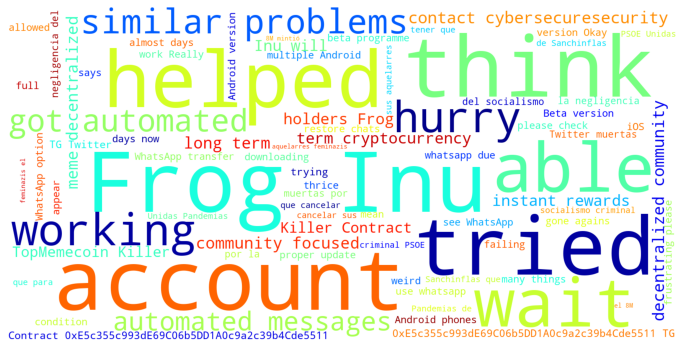

In [ ]:
neg_sentences = negative['Text'].tolist()
neg_sentences_as_one_string = " ".join(neg_sentences)
plt.figure(figsize = (15,15))
wordcloud = WordCloud(
        background_color='white',
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(neg_sentences_as_one_string)
plt.figure(figsize=(12, 10))
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear");
plt.imshow(wordcloud)

<Figure size 1080x1080 with 0 Axes>

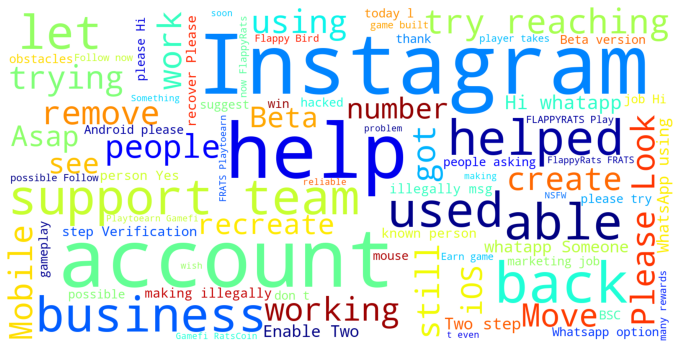

In [ ]:
pos_sentences = positive['Text'].tolist()
pos_sentences_as_one_string = " ".join(pos_sentences)
plt.figure(figsize = (15,15))
wordcloud = WordCloud(
        background_color='white',
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(pos_sentences_as_one_string)
plt.figure(figsize=(12, 10))
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear");
plt.imshow(wordcloud)

<Figure size 1080x1080 with 0 Axes>

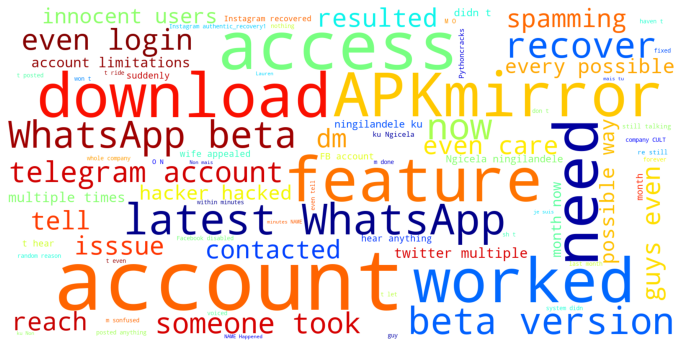

In [ ]:
neu_sentences = neutral['Text'].tolist()
neu_sentences_as_one_string = " ".join(neu_sentences)
plt.figure(figsize = (15,15))
wordcloud = WordCloud(
        background_color='white',
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(neu_sentences_as_one_string)
plt.figure(figsize=(12, 10))
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear");
plt.imshow(wordcloud)

In [ ]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(dataframe['Text'][dataframe['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
#HT_positive

In [ ]:
#Collect the compound values for each news source
score_table = dataframe.pivot_table(index='Account',  values="Compound", aggfunc = np.mean)
score_table

,Compound
Account,
facebook,-0.031306
instagram,0.081103
messenger,-0.072470
snapchat,0.077882
telegram,0.164028
whatsapp,0.051440


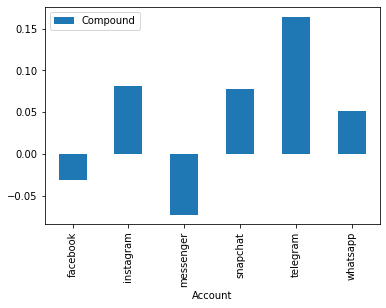

In [ ]:
score_table.plot(kind='bar')


In [ ]:
#Collect the negative values for each news source
neg_score_table = dataframe.pivot_table(index='Account',  values="Negative", aggfunc = np.mean)
neg_score_table

,Negative
Account,
facebook,0.140315
instagram,0.088443
messenger,0.123800
snapchat,0.091146
telegram,0.099500
whatsapp,0.054700


In [ ]:
# pos_sentences = dataframe['text'].tolist()
# pos_sentences_as_one_string = " ".join(pos_sentences)
 
#  wordcloud = WordCloud(
#         background_color='white',
#         stopwords=stopwords,
#         width=1600,
#         height=800,
#         random_state=1,
#         colormap='jet',
#         max_words=80,
#         max_font_size=200).generate(all_words)
#     plt.figure(figsize=(12, 10))
#     plt.axis('off')
#     plt.imshow(wordcloud, interpolation="bilinear");

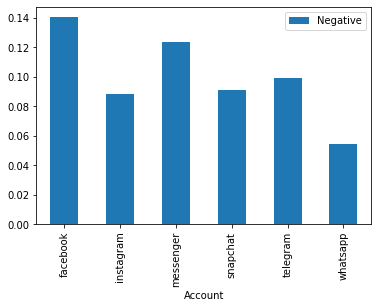

In [ ]:
neg_score_table.plot(kind='bar')

In [ ]:
 #Collect the negative values for each news source
pos_score_table = dataframe.pivot_table(index='Account',  values="Positive", aggfunc = np.mean)
pos_score_table

,Positive
Account,
facebook,0.119925
instagram,0.128725
messenger,0.083400
snapchat,0.097439
telegram,0.162247
whatsapp,0.071500


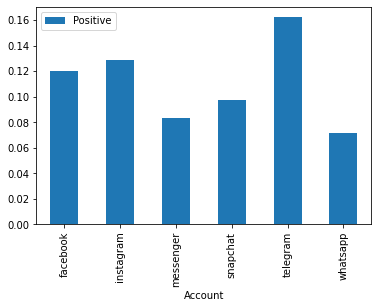

In [ ]:
pos_score_table.plot(kind='bar')

In [ ]:

loca_df = dataframe[dataframe['Location'].notnull()]
len(loca_df)


9149

In [ ]:
loca_df

,Text,Author_id,Id,Username,Location,Account,Compound,Positive,Negative,Neutral,label
0,yea i just contacted customer support on the...,1.340000e+18,1.550000e+18,PENIELMARAJ,🇬🇭 || 𝐛𝐥𝐤 || 𝐡𝐞 || 𝐛𝐢,snapchat,-0.6597,0.077,0.259,0.664,Negative
2,I stil can’t log in to my account it says bc ...,1.400000e+18,1.550000e+18,gamermika19,"Roermond, Nederland",snapchat,0.1855,0.101,0.109,0.790,Positive
9,"when switching between cameras on my s22, i c...",1.090000e+18,1.550000e+18,DrMagnusW1,"Steinkjer, Norge",snapchat,0.5499,0.139,0.000,0.861,Positive
10,Mine still ain’t working and y’all couldn’t h...,1.120000e+18,1.550000e+18,lexiLeighaHart,"Florida, USA",snapchat,0.4019,0.105,0.000,0.895,Positive
13,fix it omg it’s been a fuckimg day,1.290000e+18,1.550000e+18,sxdek,United Kingdom,snapchat,0.0000,0.000,0.000,1.000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
15065,So Facebook disabled my account for some rando...,1.197863e+08,1.560000e+18,TCapitalG,Cincinnati|L.A.|Corpus Christi,facebook,0.0000,0.000,0.000,1.000,Neutral
15067,And you will pay the price one day for lyi...,7.732281e+08,1.560000e+18,HAdamsen,"Hillerød, Danmark",facebook,-0.7351,0.000,0.298,0.702,Negative
15068,is there someway to contact you guys directly...,1.023073e+08,1.560000e+18,OdrarEth,"Florida, USA",facebook,-0.5994,0.000,0.123,0.877,Negative
15070,😆\n\nI'll post them as soon as my ban is ove...,7.113803e+08,1.560000e+18,lifelong_lfc,"North West, England",facebook,-0.3382,0.117,0.182,0.701,Negative


In [ ]:
temp_df = loca_df['Location'].str.split(',', expand=True)
temp_df.columns= ['city','country']
new_loc_df = pd.concat([loca_df,temp_df], axis=1,ignore_index=False)
new_loc_df

,Text,Author_id,Id,Username,Location,Account,Compound,Positive,Negative,Neutral,label,city,country
0,yea i just contacted customer support on the...,1.340000e+18,1.550000e+18,PENIELMARAJ,🇬🇭 || 𝐛𝐥𝐤 || 𝐡𝐞 || 𝐛𝐢,snapchat,-0.6597,0.077,0.259,0.664,Negative,🇬🇭 || 𝐛𝐥𝐤 || 𝐡𝐞 || 𝐛𝐢,None
2,I stil can’t log in to my account it says bc ...,1.400000e+18,1.550000e+18,gamermika19,"Roermond, Nederland",snapchat,0.1855,0.101,0.109,0.790,Positive,Roermond,Nederland
9,"when switching between cameras on my s22, i c...",1.090000e+18,1.550000e+18,DrMagnusW1,"Steinkjer, Norge",snapchat,0.5499,0.139,0.000,0.861,Positive,Steinkjer,Norge
10,Mine still ain’t working and y’all couldn’t h...,1.120000e+18,1.550000e+18,lexiLeighaHart,"Florida, USA",snapchat,0.4019,0.105,0.000,0.895,Positive,Florida,USA
13,fix it omg it’s been a fuckimg day,1.290000e+18,1.550000e+18,sxdek,United Kingdom,snapchat,0.0000,0.000,0.000,1.000,Neutral,United Kingdom,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15065,So Facebook disabled my account for some rando...,1.197863e+08,1.560000e+18,TCapitalG,Cincinnati|L.A.|Corpus Christi,facebook,0.0000,0.000,0.000,1.000,Neutral,Cincinnati|L.A.|Corpus Christi,None
15067,And you will pay the price one day for lyi...,7.732281e+08,1.560000e+18,HAdamsen,"Hillerød, Danmark",facebook,-0.7351,0.000,0.298,0.702,Negative,Hillerød,Danmark
15068,is there someway to contact you guys directly...,1.023073e+08,1.560000e+18,OdrarEth,"Florida, USA",facebook,-0.5994,0.000,0.123,0.877,Negative,Florida,USA
15070,😆\n\nI'll post them as soon as my ban is ove...,7.113803e+08,1.560000e+18,lifelong_lfc,"North West, England",facebook,-0.3382,0.117,0.182,0.701,Negative,North West,England


In [ ]:
len(new_loc_df)

9149

In [ ]:
new_loc_df = new_loc_df[new_loc_df['country'].notnull()]

In [ ]:
new_loc_df

,Text,Author_id,Id,Username,Location,Account,Compound,Positive,Negative,Neutral,label,city,country
2,I stil can’t log in to my account it says bc ...,1.400000e+18,1.550000e+18,gamermika19,"Roermond, Nederland",snapchat,0.1855,0.101,0.109,0.790,Positive,Roermond,Nederland
9,"when switching between cameras on my s22, i c...",1.090000e+18,1.550000e+18,DrMagnusW1,"Steinkjer, Norge",snapchat,0.5499,0.139,0.000,0.861,Positive,Steinkjer,Norge
10,Mine still ain’t working and y’all couldn’t h...,1.120000e+18,1.550000e+18,lexiLeighaHart,"Florida, USA",snapchat,0.4019,0.105,0.000,0.895,Positive,Florida,USA
19,,1.499320e+09,1.550000e+18,JacobBlackey,"Belmont, NH",snapchat,0.0000,0.000,0.000,0.000,Neutral,Belmont,NH
20,"when switching between cameras on my s22, i c...",1.090000e+18,1.550000e+18,DrMagnusW1,"Steinkjer, Norge",snapchat,0.5499,0.139,0.000,0.861,Positive,Steinkjer,Norge
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15062,is there someway to contact you guys directly...,1.023073e+08,1.560000e+18,OdrarEth,"Florida, USA",facebook,-0.5994,0.000,0.123,0.877,Negative,Florida,USA
15064,😆\n\nI'll post them as soon as my ban is ove...,7.113803e+08,1.560000e+18,lifelong_lfc,"North West, England",facebook,-0.3382,0.117,0.182,0.701,Negative,North West,England
15067,And you will pay the price one day for lyi...,7.732281e+08,1.560000e+18,HAdamsen,"Hillerød, Danmark",facebook,-0.7351,0.000,0.298,0.702,Negative,Hillerød,Danmark
15068,is there someway to contact you guys directly...,1.023073e+08,1.560000e+18,OdrarEth,"Florida, USA",facebook,-0.5994,0.000,0.123,0.877,Negative,Florida,USA


In [ ]:
len(new_loc_df)

4617

In [ ]:
loc_based_neg_score_table = new_loc_df.pivot_table(index=['country','Account'],  values="Negative", aggfunc = np.mean)

In [ ]:
loc_based_neg_score_table

Negative
country         Account            
 Austria        messenger  0.093000
 CA             facebook   0.447000
                whatsapp   0.000000
 Danmark        facebook   0.298000
 England        facebook   0.182000
                instagram  0.075000
                whatsapp   0.088000
 GA             facebook   0.213178
 IL             snapchat   0.508000
 IN             instagram  0.000000
 India          instagram  0.141196
                snapchat   0.116000
                telegram   0.097000
                whatsapp   0.113333
 MD             snapchat   0.000000
 MO             snapchat   0.156000
 Myanmar        messenger  0.045000
 NH             snapchat   0.000000
 NM             facebook   0.221000
 Nederland      snapchat   0.109000
 Norge          snapchat   0.000000
 OH             snapchat   0.000000
 RI             snapchat   0.000000
 SD             snapchat   0.000000
 South Africa   instagram  0.000000
 Spain          telegram   0.000000
 USA            facebook   0.067355
                snapchat   0.003967
                telegram   0.153000
 USA            facebook   0.000000
 YEG            facebook   0.160000
sunyani-odumasi messenger  0.000000

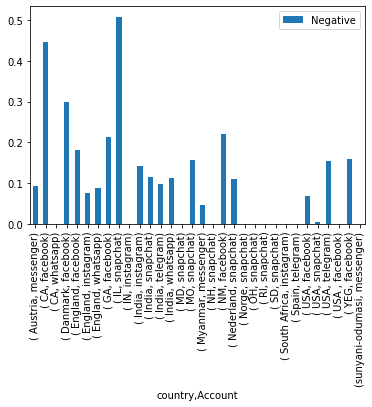

In [ ]:
loc_based_neg_score_table.plot(kind='bar')

In [ ]:
loc_based_pos_score_table = new_loc_df.pivot_table(index=['country','Account'],  values="Positive", aggfunc = np.mean)

In [ ]:
loc_based_pos_score_table

Positive
country         Account            
 Austria        messenger  0.078000
 CA             facebook   0.289000
                whatsapp   0.000000
 Danmark        facebook   0.000000
 England        facebook   0.117000
                instagram  0.201000
                whatsapp   0.000000
 GA             facebook   0.380493
 IL             snapchat   0.000000
 IN             instagram  0.000000
 India          instagram  0.270298
                snapchat   0.435000
                telegram   0.113000
                whatsapp   0.027333
 MD             snapchat   0.261500
 MO             snapchat   0.098000
 Myanmar        messenger  0.154000
 NH             snapchat   0.000000
 NM             facebook   0.000000
 Nederland      snapchat   0.101000
 Norge          snapchat   0.139000
 OH             snapchat   0.000000
 RI             snapchat   0.431000
 SD             snapchat   0.000000
 South Africa   instagram  0.000000
 Spain          telegram   0.224000
 USA            facebook   0.063424
                snapchat   0.205000
                telegram   0.181000
 USA            facebook   0.000000
 YEG            facebook   0.063000
sunyani-odumasi messenger  0.000000

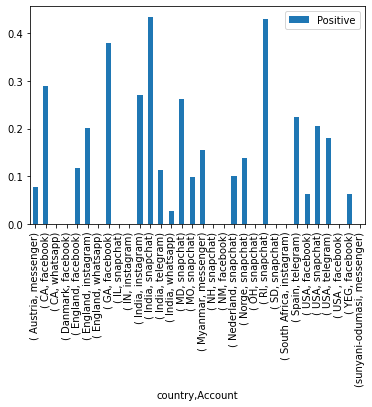

In [ ]:
loc_based_pos_score_table.plot(kind='bar')

In [ ]:
loc_based_neu_score_table = new_loc_df.pivot_table(index=['country','Account'],  values="Compound", aggfunc = np.mean)

In [ ]:
loc_based_neu_score_table

Compound
country         Account            
 Austria        messenger -0.226300
 CA             facebook  -0.296000
                whatsapp   0.000000
 Danmark        facebook  -0.735100
 England        facebook  -0.338200
                instagram  0.542300
                whatsapp  -0.537900
 GA             facebook   0.773538
 IL             snapchat  -0.476700
 IN             instagram  0.000000
 India          instagram  0.168860
                snapchat   0.853700
                telegram  -0.025800
                whatsapp  -0.157967
 MD             snapchat   0.254000
 MO             snapchat  -0.368500
 Myanmar        messenger  0.612400
 NH             snapchat   0.000000
 NM             facebook  -0.526700
 Nederland      snapchat   0.185500
 Norge          snapchat   0.549900
 OH             snapchat   0.000000
 RI             snapchat   0.464800
 SD             snapchat   0.000000
 South Africa   instagram  0.000000
 Spain          telegram   0.636900
 USA            facebook   0.122091
                snapchat   0.491700
                telegram   0.102700
 USA            facebook   0.000000
 YEG            facebook  -0.599400
sunyani-odumasi messenger  0.000000

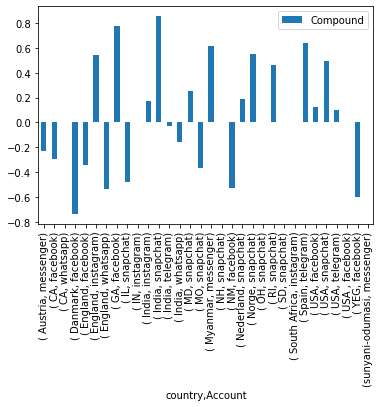

In [ ]:
loc_based_neu_score_table.plot(kind='bar')

In [ ]:
type(loc_based_neu_score_table)

pandas.core.frame.DataFrame

In [ ]:
loc_based_neu_score_table.index

MultiIndex([(       ' Austria', 'messenger'),
            (            ' CA',  'facebook'),
            (            ' CA',  'whatsapp'),
            (       ' Danmark',  'facebook'),
            (       ' England',  'facebook'),
            (       ' England', 'instagram'),
            (       ' England',  'whatsapp'),
            (            ' GA',  'facebook'),
            (            ' IL',  'snapchat'),
            (            ' IN', 'instagram'),
            (         ' India', 'instagram'),
            (         ' India',  'snapchat'),
            (         ' India',  'telegram'),
            (         ' India',  'whatsapp'),
            (            ' MD',  'snapchat'),
            (            ' MO',  'snapchat'),
            (       ' Myanmar', 'messenger'),
            (            ' NH',  'snapchat'),
            (            ' NM',  'facebook'),
            (     ' Nederland',  'snapchat'),
            (         ' Norge',  'snapchat'),
            (            ' OH',  '

In [ ]:
new_loc_df

,Text,Author_id,Id,Username,Location,Account,Compound,Positive,Negative,Neutral,label,city,country
2,I stil can’t log in to my account it says bc ...,1.400000e+18,1.550000e+18,gamermika19,"Roermond, Nederland",snapchat,0.1855,0.101,0.109,0.790,Positive,Roermond,Nederland
9,"when switching between cameras on my s22, i c...",1.090000e+18,1.550000e+18,DrMagnusW1,"Steinkjer, Norge",snapchat,0.5499,0.139,0.000,0.861,Positive,Steinkjer,Norge
10,Mine still ain’t working and y’all couldn’t h...,1.120000e+18,1.550000e+18,lexiLeighaHart,"Florida, USA",snapchat,0.4019,0.105,0.000,0.895,Positive,Florida,USA
19,,1.499320e+09,1.550000e+18,JacobBlackey,"Belmont, NH",snapchat,0.0000,0.000,0.000,0.000,Neutral,Belmont,NH
20,"when switching between cameras on my s22, i c...",1.090000e+18,1.550000e+18,DrMagnusW1,"Steinkjer, Norge",snapchat,0.5499,0.139,0.000,0.861,Positive,Steinkjer,Norge
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15062,is there someway to contact you guys directly...,1.023073e+08,1.560000e+18,OdrarEth,"Florida, USA",facebook,-0.5994,0.000,0.123,0.877,Negative,Florida,USA
15064,😆\n\nI'll post them as soon as my ban is ove...,7.113803e+08,1.560000e+18,lifelong_lfc,"North West, England",facebook,-0.3382,0.117,0.182,0.701,Negative,North West,England
15067,And you will pay the price one day for lyi...,7.732281e+08,1.560000e+18,HAdamsen,"Hillerød, Danmark",facebook,-0.7351,0.000,0.298,0.702,Negative,Hillerød,Danmark
15068,is there someway to contact you guys directly...,1.023073e+08,1.560000e+18,OdrarEth,"Florida, USA",facebook,-0.5994,0.000,0.123,0.877,Negative,Florida,USA


In [ ]:
#l1 = new_loc_df[[' England',  'instagram']]

df_tp1 = new_loc_df[(new_loc_df["country"] == ' England') & (new_loc_df["Account"] == 'instagram')]
df_tp2 = new_loc_df[(new_loc_df["country"] == ' England') & (new_loc_df["Account"] == 'whatsapp')]
l1 = df_tp1['Compound'].tolist()
l2 = df_tp2['Compound'].tolist()
final_list1 = l1+l2

df_tp3 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'instagram')]
df_tp4 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'whatsapp')]
l3 = df_tp3['Compound'].tolist()
l4 = df_tp4['Compound'].tolist()
final_list2 = l3 + l4

In [ ]:
len(final_list1)

450

In [ ]:
len(final_list2)

1576

In [ ]:
data_dict = {'Eng':final_list1,"Ind":final_list2}

df = pd.DataFrame({'Eng': pd.Series(final_list1), 'Ind': pd.Series(final_list2)})
df = df.replace(np.nan, 0)


In [ ]:
results = mannwhitneyu(df['Eng'], df['Ind'])
results

MannwhitneyuResult(statistic=1429139.0, pvalue=3.1077084834410555e-15)

In [ ]:


df_tp1 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'telegram')]
df_tp2 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'snapchat')]
l1 = df_tp1['Compound'].tolist()
l2 = df_tp2['Compound'].tolist()
final_list1 = l1+l2

df_tp3 = new_loc_df[(new_loc_df["country"] == ' USA') & (new_loc_df["Account"] == 'telegram')]
df_tp4 = new_loc_df[(new_loc_df["country"] == ' USA') & (new_loc_df["Account"] == 'snapchat')]
l3 = df_tp3['Compound'].tolist()
l4 = df_tp4['Compound'].tolist()
final_list2 = l3 + l4



data_dict = {'Ind':final_list1,"USA":final_list2}

df = pd.DataFrame({'Ind': pd.Series(final_list1), 'USA': pd.Series(final_list2)})
df = df.replace(np.nan, 0)


In [ ]:
results = mannwhitneyu(df['Ind'], df['USA'])
results

MannwhitneyuResult(statistic=445.0, pvalue=1.0416942005059925e-172)

In [ ]:
df_tp1 = new_loc_df[(new_loc_df["country"] == ' Danmark') & (new_loc_df["Account"] == 'facebook')]
df_tp2 = new_loc_df[(new_loc_df["country"] == ' England') & (new_loc_df["Account"] == 'facebook')]
df_tp3 = new_loc_df[(new_loc_df["country"] == ' USA') & (new_loc_df["Account"] == 'facebook')]
l1 = df_tp1['Compound'].tolist()
l2 = df_tp2['Compound'].tolist()
l3 = df_tp3['Compound'].tolist()
final_list1 = l1+l2+l3

df_tp4 = new_loc_df[(new_loc_df["country"] == ' England') & (new_loc_df["Account"] == 'instagram')]
df_tp5 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'instagram')]
df_tp6 = new_loc_df[(new_loc_df["country"] == ' South Africa') & (new_loc_df["Account"] == 'instagram')]
l4 = df_tp4['Compound'].tolist()
l5 = df_tp5['Compound'].tolist()
l6 = df_tp6['Compound'].tolist()
final_list2 = l4 + l5 +l6



data_dict = {'Fb':final_list1,"Inst":final_list2}

df_fb_inst = pd.DataFrame({'Fb': pd.Series(final_list1), 'Inst': pd.Series(final_list2)})
df_fb_inst = df_fb_inst.replace(np.nan, 0)




In [ ]:
results = mannwhitneyu(df_fb_inst['Fb'], df_fb_inst['Inst'])
results

MannwhitneyuResult(statistic=143144.5, pvalue=0.036003201427796325)

In [ ]:
df_tp1 = new_loc_df[(new_loc_df["country"] == ' Nederland') & (new_loc_df["Account"] == 'snapchat')]
df_tp2 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'snapchat')]
df_tp3 = new_loc_df[(new_loc_df["country"] == ' USA') & (new_loc_df["Account"] == 'snapchat')]
l1 = df_tp1['Compound'].tolist()
l2 = df_tp2['Compound'].tolist()
l3 = df_tp3['Compound'].tolist()
final_list1 = l1+l2+l3

df_tp4 = new_loc_df[(new_loc_df["country"] == ' England') & (new_loc_df["Account"] == 'instagram')]
df_tp5 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'instagram')]
df_tp6 = new_loc_df[(new_loc_df["country"] == ' South Africa') & (new_loc_df["Account"] == 'instagram')]
l4 = df_tp4['Compound'].tolist()
l5 = df_tp5['Compound'].tolist()
l6 = df_tp6['Compound'].tolist()
final_list2 =  l4 +l5+l6



data_dict = {'Sn':final_list1,"Ins":final_list2}

df_fb_inst = pd.DataFrame({'Sn': pd.Series(final_list1), 'Ins': pd.Series(final_list2)})
df_fb_inst = df_fb_inst.replace(np.nan, 0)

In [ ]:
results = mannwhitneyu(df_fb_inst['Sn'], df_fb_inst['Ins'])
results

MannwhitneyuResult(statistic=88320.0, pvalue=3.933134314972951e-06)

In [ ]:
df_tp1 = new_loc_df[(new_loc_df["country"] == ' England') & (new_loc_df["Account"] == 'Whatsapp')]
df_tp2 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'Whatsapp')]
l1 = df_tp1['Compound'].tolist()
l2 = df_tp2['Compound'].tolist()

final_list1 = l1+l2
df_tp2 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'snapchat')]
df_tp3 = new_loc_df[(new_loc_df["country"] == ' USA') & (new_loc_df["Account"] == 'snapchat')]
l3 = df_tp3['Compound'].tolist()
l4 = df_tp4['Compound'].tolist()
final_list2 = l3 + l4
df_fb_inst = pd.DataFrame({'Wh': pd.Series(final_list1), 'Sn': pd.Series(final_list2)})
df_fb_inst = df_fb_inst.replace(np.nan, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':


In [ ]:
results = mannwhitneyu(df_fb_inst['Wh'], df_fb_inst['Sn'])
results

MannwhitneyuResult(statistic=0.0, pvalue=1.3311138118554098e-14)

In [ ]:
df_tp1 = new_loc_df[(new_loc_df["country"] == ' Danmark') & (new_loc_df["Account"] == 'facebook')]
df_tp2 = new_loc_df[(new_loc_df["country"] == ' England') & (new_loc_df["Account"] == 'facebook')]
df_tp3 = new_loc_df[(new_loc_df["country"] == ' USA') & (new_loc_df["Account"] == 'facebook')]
l1 = df_tp1['Compound'].tolist()
l2 = df_tp2['Compound'].tolist()
l3 = df_tp3['Compound'].tolist()
final_list1 = l1+l2+l3

df_tp4 = new_loc_df[(new_loc_df["country"] == ' England') & (new_loc_df["Account"] == 'Whatsapp')]
df_tp5 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'Whatsapp')]
l4 = df_tp4['Compound'].tolist()
l5 = df_tp5['Compound'].tolist()
final_list2 = l4 + l5

df_fb_inst = pd.DataFrame({'Fb': pd.Series(final_list1), 'What': pd.Series(final_list2)})
df_fb_inst = df_fb_inst.replace(np.nan, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


In [ ]:
results = mannwhitneyu(df_fb_inst['Fb'], df_fb_inst['What'])
results

MannwhitneyuResult(statistic=162892.5, pvalue=0.06173878799528974)

In [ ]:
df_tp1 = new_loc_df[(new_loc_df["country"] == ' England') & (new_loc_df["Account"] == 'instagram')]
df_tp2 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'instagram')]
df_tp3 = new_loc_df[(new_loc_df["country"] == ' South Africa') & (new_loc_df["Account"] == 'instagram')]
l1 = df_tp1['Compound'].tolist()
l2 = df_tp2['Compound'].tolist()
l3 = df_tp3['Compound'].tolist()
final_list1 =  l1 +l2+l3

df_tp4 = new_loc_df[(new_loc_df["country"] == ' England') & (new_loc_df["Account"] == 'Whatsapp')]
df_tp5 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'Whatsapp')]
l4 = df_tp4['Compound'].tolist()
l5 = df_tp5['Compound'].tolist()
final_list2 = l4 + l5


df_fb_inst = pd.DataFrame({'Ins': pd.Series(final_list1), 'What': pd.Series(final_list2)})
df_fb_inst = df_fb_inst.replace(np.nan, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  app.launch_new_instance()


In [ ]:
results = mannwhitneyu(df_fb_inst['Ins'], df_fb_inst['What'])
results

MannwhitneyuResult(statistic=66690.0, pvalue=0.00024544970366060256)

In [ ]:
df_tp1 = new_loc_df[(new_loc_df["country"] == ' Danmark') & (new_loc_df["Account"] == 'facebook')]
df_tp2 = new_loc_df[(new_loc_df["country"] == ' England') & (new_loc_df["Account"] == 'facebook')]
df_tp3 = new_loc_df[(new_loc_df["country"] == ' USA') & (new_loc_df["Account"] == 'facebook')]
l1 = df_tp1['Compound'].tolist()
l2 = df_tp2['Compound'].tolist()
l3 = df_tp3['Compound'].tolist()
final_list1 = l1+l2+l3

df_tp4 = new_loc_df[(new_loc_df["country"] == ' India') & (new_loc_df["Account"] == 'snapchat')]
df_tp5 = new_loc_df[(new_loc_df["country"] == ' USA') & (new_loc_df["Account"] == 'snapchat')]
l4 = df_tp4['Compound'].tolist()
l5 = df_tp5['Compound'].tolist()
final_list2 = l4 + l5


df_fb_inst = pd.DataFrame({'Fb': pd.Series(final_list1), 'Sn': pd.Series(final_list2)})
df_fb_inst = df_fb_inst.replace(np.nan, 0)

In [ ]:
results = mannwhitneyu(df_fb_inst['Fb'], df_fb_inst['Sn'])
results

MannwhitneyuResult(statistic=159894.0, pvalue=0.22390255208847598)